### **Required Imports**

In [1]:
from coc131_cw import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
coc = COC131()

---

## **Question 1: EuroSAT_RGB Dataset Preprocessing**

This function is responsible for **loading and preprocessing** the `EuroSAT_RGB` image dataset. The key steps include:

- **Resizing** images to **32×32 pixels**
- **Flattening** images into **NumPy arrays**
- Storing processed images and their corresponding **labels** in `self.x` and `self.y`

If a **specific image file** is provided, the function will:

- Return the **processed array** of that image  
- The **class label** of that image


In [2]:
res1, res2 = coc.q1('AnnualCrop_1.jpg')
print(f"res1: {res1} | res2: {res2}") 
print(f"Shape: {res1.shape}")

res1: [149. 121. 120. ... 106.  94. 104.] | res2: AnnualCrop
Shape: (3072,)


---

## **Question 2: Data Standardisation with StandardScaler**

This function performs **standardisation** on the input data using `StandardScaler`. The transformation ensures that:

- The **mean** of the data is **0**
- The **standard deviation** is **2.5**

It returns:

- The **transformed (standardised) data**
- The fitted **`StandardScaler` object** for potential reuse


In [3]:
standardisedData, scalar = coc.q2(coc.x)

print(f"Standardized Data:\n {standardisedData}")
print("-" * 120)
print(f"Shape of standardized data: {standardisedData.shape}")
print("-" * 120)
print(f"Scaler mean (per feature): {scalar.mean_}")
print("-" * 120)
print(f"Scaler scale (std before multiplying): {scalar.scale_}")
print("-" * 120)
print(f"Standard deviation after scaling to 2.5: {scalar.scale_ * 2.5}")
print("-" * 120)


def plot_data_comparison(data, standardisedData):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Original data
    axes[0].scatter(data[:, 0], data[:, 1], alpha=0.7, color='teal')
    axes[0].set_title("Original Data")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")

    # Standardized data
    axes[1].scatter(standardisedData[:, 0], standardisedData[:, 1], alpha=0.7, color='darkorange')
    axes[1].set_title("Standardized Data (std = 2.5)")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

Standardized Data:
 [[ 3.09729958  1.92338717  1.5778442  ...  0.88276404 -0.19704766
   0.01473883]
 [-1.50333056  0.18234666 -1.73729847 ...  4.14816893  2.22844746
   0.72204561]
 [-0.81076258 -0.27183782 -0.44807632 ...  5.65902792  4.65394259
   4.17016614]
 ...
 [-2.74005909 -3.07264213 -2.19773495 ... -2.82127734 -3.13704175
  -1.9303548 ]
 [-1.60226884 -1.86148351 -2.01356036 ... -1.70031745 -1.74054456
  -1.9303548 ]
 [ 0.77224994  0.33374149  0.56488394 ...  0.39539017 -0.05004795
   0.19156553]]
------------------------------------------------------------------------------------------------------------------------
Shape of standardized data: (27000, 3072)
------------------------------------------------------------------------------------------------------------------------
Scaler mean (per feature): [ 86.38925926  95.59111111 102.86577778 ...  87.88733333  96.68092593
 103.8332963 ]
--------------------------------------------------------------------------------------------

---

### **Visual Comparison of Original vs. Standardised Data**

The figures below displays a **side-by-side comparison** of the dataset **before and after standardisation**:

---

#### **Original Data Plot**
- This scatter plot shows the raw input data.
- The features vary in scale, which can affect the performance of machine learning models negatively, in particular the ones sensitive to feature magnitude (e.g., MLPs, SVMs).
- Uneven feature scales can lead to biased learning, and as a result, larger-scaled features dominate model training.

---

#### **Standardised Data (std = 2.5) Plot**
- This plot shows the same data after being **standardised** using `StandardScaler`, followed by **scaling the standard deviation to 2.5**.
- Each feature now has a **mean close to 0** and a **controlled spread with a standard deviation of 2.5**.
- This uniform scaling helps improve model training stability and convergence.

---

**Why It Matters:**  
Standardisation ensures that **all features contribute equally** during training, preventing dominance by any particular feature due to scale, and often results in **better performance**.

---

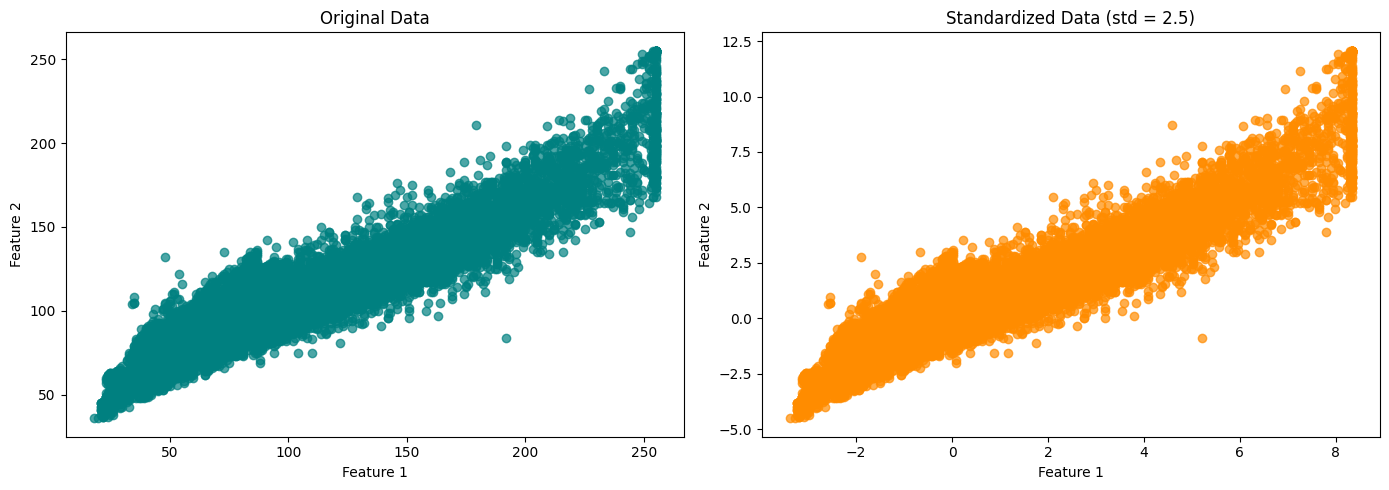

In [4]:
plot_data_comparison(coc.x, standardisedData)

---

## **Question 3: Training & Evaluating an MLP Classifier**

This function is designed to **train and evaluate** a **Multi-Layer Perceptron (MLP)** classifier on a **standardised dataset**. Key features include:

- Optional **hyperparameter tuning** using a **grid search**
- Uses a provided **train-test split**, or creates one if not given
- Trains models over **multiple epochs**, tracking:
  - **Loss**
  - **Accuracy**

The function ultimately returns:

- The **best-performing model**
- Its **loss and accuracy curves** for performance visualisation

In [4]:
best_model, best_loss_curve, best_train_curve, best_test_curve = coc.q3(test_size=0.2)

print(f"Final Training Accuracy: {round(best_train_curve[-1], 4)}")
print(f"Final Testing Accuracy: {round(best_test_curve[-1], 4)}")
print(f"Loss Curve: {best_loss_curve}")

Best Parameters: {'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.005, 'activation': 'relu', 'momentum': 0.95, 'max_iter': 1, 'learning_rate': 'constant', 'solver': 'sgd', 'warm_start': True}
Final Training Accuracy: 0.7304
Final Testing Accuracy: 0.6378
Loss Curve: [1.52007496 1.14754586 1.02004119 0.93216983 0.86459835]


In [52]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_hyperparam_results(loss_curve, train_curve, test_curve):
    epochs = range(1, len(loss_curve) + 1)
    plt.figure(figsize=(15, 4))
    
    # Loss Curve
    plt.subplot(1, 3, 1)
    plt.plot(epochs, loss_curve, marker='o', color='red')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    # Accuracy Curve
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_curve, marker='o', label='Train Accuracy', color='blue')
    plt.plot(epochs, test_curve, marker='o', label='Test Accuracy', color='green')
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Accuracy Gap (Train - Test)
    plt.subplot(1, 3, 3)
    acc_gap = np.array(train_curve) - np.array(test_curve)
    plt.plot(epochs, acc_gap, marker='o', color='purple')
    plt.title("Accuracy Gap (Train - Test)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Gap")
    
    plt.tight_layout()
    plt.show()

def extract_hyperparam(params, key):
    """
    Extract a hyperparameter value from a dictionary.
    """
    if isinstance(params, dict) and key in params:
        return params[key]
    elif isinstance(params, str):
        # Fall back to regex extraction if it's a string
        pattern = rf"{re.escape(key)}\s*[:=]\s*([^,\s\)]+)"
        match = re.search(pattern, params)
        if match:
            return match.group(1)
    
    print(f"Could not extract {key} from: {params}")
    return "unknown"

def plot_by_hyperparam_accuracy_effect(results, param_name):
    grouped = defaultdict(list)
    
    # Print the first result to debug the structure
    if results and len(results) > 0:
        print(f"Example result structure: {results[0][0]}")  # Print the first label
    
    # Group results by hyperparameter
    for result in results:
        # Handle different result structures
        if len(result) != 4:
            print(f"Warning: Expected 4 elements in result, got {len(result)}")
            continue
            
        params, loss, train, test = result
        
        # Skip if any component is None
        if any(x is None for x in [params, loss, train, test]):
            print("Warning: Skipping result with None components")
            continue
            
        param_value = extract_hyperparam(params, param_name)
        
        try:
            # Handle numpy arrays properly - get the last element
            if isinstance(train, np.ndarray):
                final_train_acc = train[-1] if train.size > 0 else 0
            elif isinstance(train, list):
                final_train_acc = train[-1] if len(train) > 0 else 0
            else:
                final_train_acc = 0
                print(f"Warning: Unexpected train type: {type(train)}")
                
            if isinstance(test, np.ndarray):
                final_test_acc = test[-1] if test.size > 0 else 0
            elif isinstance(test, list):
                final_test_acc = test[-1] if len(test) > 0 else 0
            else:
                final_test_acc = 0
                print(f"Warning: Unexpected test type: {type(test)}")
                
            grouped[str(param_value)].append((final_train_acc, final_test_acc))
        except Exception as e:
            print(f"Error processing result: {e}")
    
    # Print extracted values for debugging
    print(f"Extracted {param_name} values: {list(grouped.keys())}")
    
    # Skip if no valid parameters were found
    if not grouped or all(k == "unknown" for k in grouped.keys()):
        print(f"No valid {param_name} values found in the parameters")
        return
    
    # Prepare data for plotting
    param_vals = list(grouped.keys())
    avg_train_acc = []
    avg_test_acc = []
    
    for param_val in param_vals:
        accs = grouped[param_val]
        if accs:
            train_accs, test_accs = zip(*accs)
            avg_train_acc.append(np.mean(train_accs))
            avg_test_acc.append(np.mean(test_accs))
        else:
            avg_train_acc.append(0)
            avg_test_acc.append(0)
    
    # Sort the hyperparameter values (numeric if possible)
    # For 'activation', keep alphabetical order
    if param_name == "activation":
        sort_idx = np.argsort(param_vals)
    else:
        try:
            # Try to convert to float for numeric sorting
            param_vals_float = [float(v) for v in param_vals if v != "unknown"]
            valid_indices = [i for i, v in enumerate(param_vals) if v != "unknown"]
            sort_idx = [valid_indices[i] for i in np.argsort(param_vals_float)]
            
            # Handle any "unknown" values that were removed
            unknown_indices = [i for i, v in enumerate(param_vals) if v == "unknown"]
            sort_idx.extend(unknown_indices)
        except ValueError:
            # Fall back to alphabetical sorting
            sort_idx = np.argsort(param_vals)
    
    # Sorted values
    param_vals_sorted = [param_vals[i] for i in sort_idx]
    avg_train_sorted = [avg_train_acc[i] for i in sort_idx]
    avg_test_sorted = [avg_test_acc[i] for i in sort_idx]
    
    # Sorted values
    param_vals_sorted = [param_vals[i] for i in sort_idx]
    avg_train_sorted = [avg_train_acc[i] for i in sort_idx]
    avg_test_sorted = [avg_test_acc[i] for i in sort_idx]
    
    # Plotting
    x = np.arange(len(param_vals_sorted))
    width = 0.35
    plt.figure(figsize=(10, 5))
    
    bars1 = plt.bar(x - width / 2, avg_train_sorted, width, label='Train Accuracy', color='skyblue')
    bars2 = plt.bar(x + width / 2, avg_test_sorted, width, label='Test Accuracy', color='lightgreen')
    
    plt.xlabel(param_name)
    plt.ylabel("Final Accuracy")
    plt.title(f"Effect of '{param_name}' on Accuracy")
    plt.xticks(x, param_vals_sorted, rotation=45)
    
    # Add value labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8)
    
    add_labels(bars1)
    add_labels(bars2)
    
    plt.legend()
    plt.tight_layout()
    plt.show()

# Sample debug function to inspect the structure of hyperparam_results
def inspect_results(results):
    print(f"Number of experiments: {len(results)}")
    if results:
        # Print the first result to understand the structure
        first_result = results[0]
        print(f"First result structure: {type(first_result)}, Length: {len(first_result)}")
        
        # Display the first element (parameters dictionary)
        params = first_result[0]
        print(f"Parameters type: {type(params)}")
        
        if isinstance(params, dict):
            print(f"Available hyperparameters in first result: {list(params.keys())}")
            
            # If it's a dictionary, directly access the hyperparameters
            if "learning_rate_init" in params:
                print(f"learning_rate_init value: {params['learning_rate_init']}")
            if "activation" in params:
                print(f"activation value: {params['activation']}")
            if "momentum" in params:
                print(f"momentum value: {params['momentum']}")
                
            # Check for unique parameter values across all results
            learning_rates = set(res[0].get('learning_rate_init', 'unknown') for res in results if isinstance(res[0], dict))
            activations = set(res[0].get('activation', 'unknown') for res in results if isinstance(res[0], dict))
            momentums = set(res[0].get('momentum', 'unknown') for res in results if isinstance(res[0], dict))
            
            print(f"Unique learning_rate_init values: {learning_rates}")
            print(f"Unique activation values: {activations}")
            print(f"Unique momentum values: {momentums}")
        else:
            # Fall back to extraction method
            learning_rates = set(extract_hyperparam(res[0], "learning_rate_init") for res in results)
            activations = set(extract_hyperparam(res[0], "activation") for res in results)
            momentum = set(extract_hyperparam(res[0], "momentum") for res in results)
            
            print(f"Unique learning_rate_init values: {learning_rates}")
            print(f"Unique activation values: {activations}")
            print(f"Unique momentum values: {momentum}")

# Example usage:
# inspect_results(coc.hyperparam_results)
# plot_by_hyperparam_accuracy_effect(coc.hyperparam_results, "learning_rate_init")
# plot_by_hyperparam_accuracy_effect(coc.hyperparam_results, "activation")
# plot_by_hyperparam_accuracy_effect(coc.hyperparam_results, "momentum")

---

### **MLP Training Results: Loss, Accuracy, and Generalisation Gap**

The plots below provide insights into the training dynamics and performance of the **best-performing MLP model** over the course of training epochs:

---

#### **Loss Curve**
- This plot shows the **training loss** over epochs.
- A **downward trend** means the model is learning and minimising the error.
- If the curve flattens out, the model is approaching convergence.
- If there is a sudden increase or erratic behavior, this indicates instability or a poor learning rate.

---

#### **Accuracy Curve (Training vs. Testing)**
- Compares the **training** and **testing accuracy** per epoch.
- Both curves should improve together and converge closely.
- A **large gap** between them may indicate **overfitting**, while low accuracy on both may suggest **underfitting** or suboptimal hyperparameters.

---

#### **Accuracy Gap (Train - Test)**
- This graph shows the **difference between training and testing accuracy**.
- A **small gap** means the model generalises well to unseen data.
- A **growing or consistently high gap** indicates overfitting, where the model performs well on training data but poorly on test data.

---

**Goal:**  
To achieve **low loss** and **high accuracy** on both training and test sets with a **minimal generalisation gap**. Together, this indicates a well-trained and generalisable model.


---

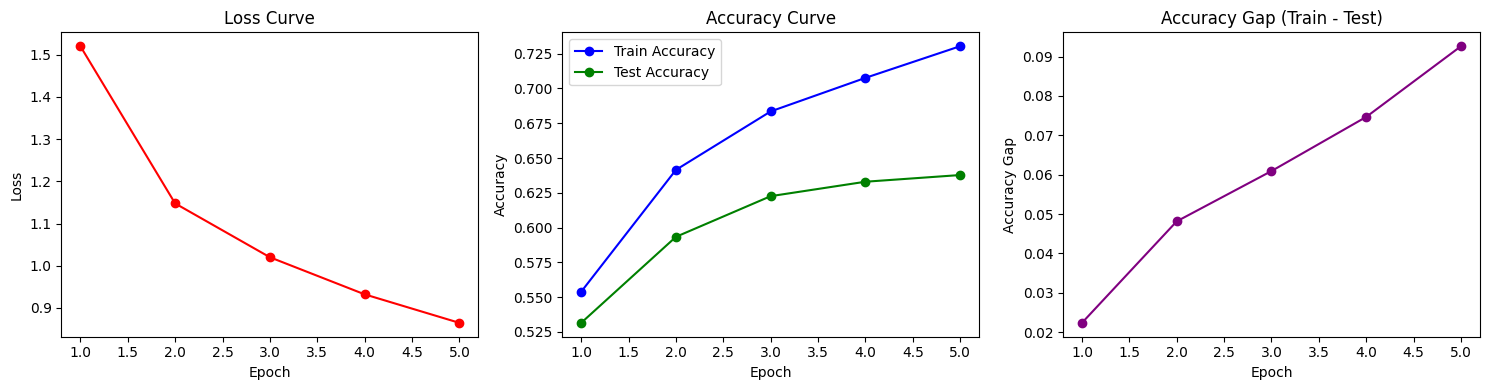

Example result structure: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu', 'momentum': 0.9, 'max_iter': 1, 'learning_rate': 'constant', 'solver': 'sgd', 'warm_start': True}
Could not extract momentum from: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu', 'momentum': 0.9, 'max_iter': 1, 'learning_rate': 'constant', 'solver': 'sgd', 'warm_start': True}
Could not extract momentum from: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu', 'momentum': 0.9, 'max_iter': 1, 'learning_rate': 'adaptive', 'solver': 'sgd', 'warm_start': True}
Could not extract momentum from: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu', 'momentum': 0.9, 'max_iter': 100, 'learning_rate': 'constant', 'solver': 'sgd', 'warm_start': True}
Could not extract momentum from: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu', 'momentum': 0.9, 'max_iter': 100, 'learning

In [53]:
plot_hyperparam_results(best_loss_curve, best_train_curve, best_test_curve)

plot_by_hyperparam_accuracy_effect(coc.hyperparam_results, "momentum")


---

## **Question 4: Evaluating Regularisation Strength in MLP Classifier**

This function investigates the impact of varying `alpha` values on the performance of an **MLP classifier**. Key features include:

- Iterating over multiple **alpha values**
- For each alpha, a model is trained from scratch using the best **hyperparameters** found
- Tracking **training** and **testing accuracy** over several epochs

The function returns:

- A **dictionary** containing **performance metrics** for each `alpha` value


In [7]:
results = coc.q4(test_size=0.2)

print(f"Results: {results}")

for alpha, metrics in results.items():
    print(f"Alpha: {alpha}")
    print(f"Loss Curve: {metrics['loss_curve']}")
    print(f"Training Accuracy Curve: {metrics['train_acc_curve']}")
    print(f"Testing Accuracy Curve: {metrics['test_acc_curve']}")
    print("-" * 40)



def plot_alpha_impact(results):
    alphas = sorted(results.keys())
    epochs = range(1, len(next(iter(results.values()))['loss_curve']) + 1)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))

    # Loss Curves
    for i, alpha in enumerate(alphas):
        axes[0].plot(epochs, results[alpha]['loss_curve'], label=f'alpha={alpha}', color=colors[i])
    axes[0].set_title("Loss Curve per Alpha")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Accuracy Curves
    for i, alpha in enumerate(alphas):
        axes[1].plot(epochs, results[alpha]['train_acc_curve'], linestyle='--', color=colors[i], label=f'Train α={alpha}')
        axes[1].plot(epochs, results[alpha]['test_acc_curve'], linestyle='-', color=colors[i], label=f'Test α={alpha}')
    axes[1].set_title("Accuracy Curves")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    # Final Accuracy Comparison
    final_train = [results[alpha]['train_acc_curve'][-1] for alpha in alphas]
    final_test = [results[alpha]['test_acc_curve'][-1] for alpha in alphas]
    width = 0.35
    x = np.arange(len(alphas))
    axes[2].bar(x - width/2, final_train, width, label='Train Acc', color='skyblue')
    axes[2].bar(x + width/2, final_test, width, label='Test Acc', color='salmon')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels([str(alpha) for alpha in alphas])
    axes[2].set_title("Final Accuracy by Alpha")
    axes[2].set_xlabel("Alpha")
    axes[2].set_ylabel("Accuracy")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

Results: {0.0001: {'loss_curve': array([1.52007496, 1.14754586, 1.02004119, 0.93216983, 0.86459835]), 'train_acc_curve': array([0.55384259, 0.64148148, 0.68351852, 0.70763889, 0.73041667]), 'test_acc_curve': array([0.53148148, 0.59333333, 0.62259259, 0.63296296, 0.63777778])}, 0.001: {'loss_curve': array([1.52134403, 1.15082144, 1.02386704, 0.93712775, 0.86562288]), 'train_acc_curve': array([0.5524537 , 0.63703704, 0.68180556, 0.71236111, 0.72861111]), 'test_acc_curve': array([0.52796296, 0.59537037, 0.62092593, 0.63185185, 0.63666667])}, 0.01: {'loss_curve': array([1.53371156, 1.1600797 , 1.0305179 , 0.94311257, 0.869067  ]), 'train_acc_curve': array([0.55481481, 0.63833333, 0.68305556, 0.71194444, 0.72833333]), 'test_acc_curve': array([0.52925926, 0.59166667, 0.61555556, 0.63777778, 0.63555556])}, 0.1: {'loss_curve': array([1.60805285, 1.23643002, 1.11127699, 1.02501656, 0.95855124]), 'train_acc_curve': array([0.55611111, 0.63976852, 0.67828704, 0.70666667, 0.72611111]), 'test_acc_cu

---

### **Impact of Regularisation (Alpha) on MLP Performance**

The visualisations below explore how different `alpha` values affect the **training dynamics** and **generalisation ability** of an MLP classifier.

---

#### **Loss Curve per Alpha**
- Shows the **loss** over training epochs for each alpha value.
- This helps identify how **regularisation affects convergence** and the stability of the model.
- A well-regularised model should show **smooth and steady loss reduction**.
- Very small or large alphas might lead to **underfitting**.

---

#### **Accuracy Curves (Training & Testing)**
- Plots both **training** and **testing accuracy** over time for each alpha.
- Dashed lines: training accuracy  
- Solid lines: testing accuracy
- Comparing these reveals how the **alpha controls overfitting**:
  - **Low alpha** → high training accuracy, lower testing accuracy (overfitting)
  - **High alpha** → both training and testing accuracy stay low (underfitting)
  - **Balanced alpha** → similar training and testing accuracy (good generalisation)

---

#### **Final Accuracy by Alpha**
- A **bar chart** comparing final training and testing accuracy for each alpha value.
- Highlights the **optimal regularisation strength**, where both accuracies are high and close together.
- Useful for selecting the **best trade-off** between bias and variance.

---

**Conclusion:**  
Regularisation plays a crucial role in controlling the **model complexity**. These plots help in selecting an alpha that leads to **stable training**, **low loss**, and **strong generalisation performance**.

---

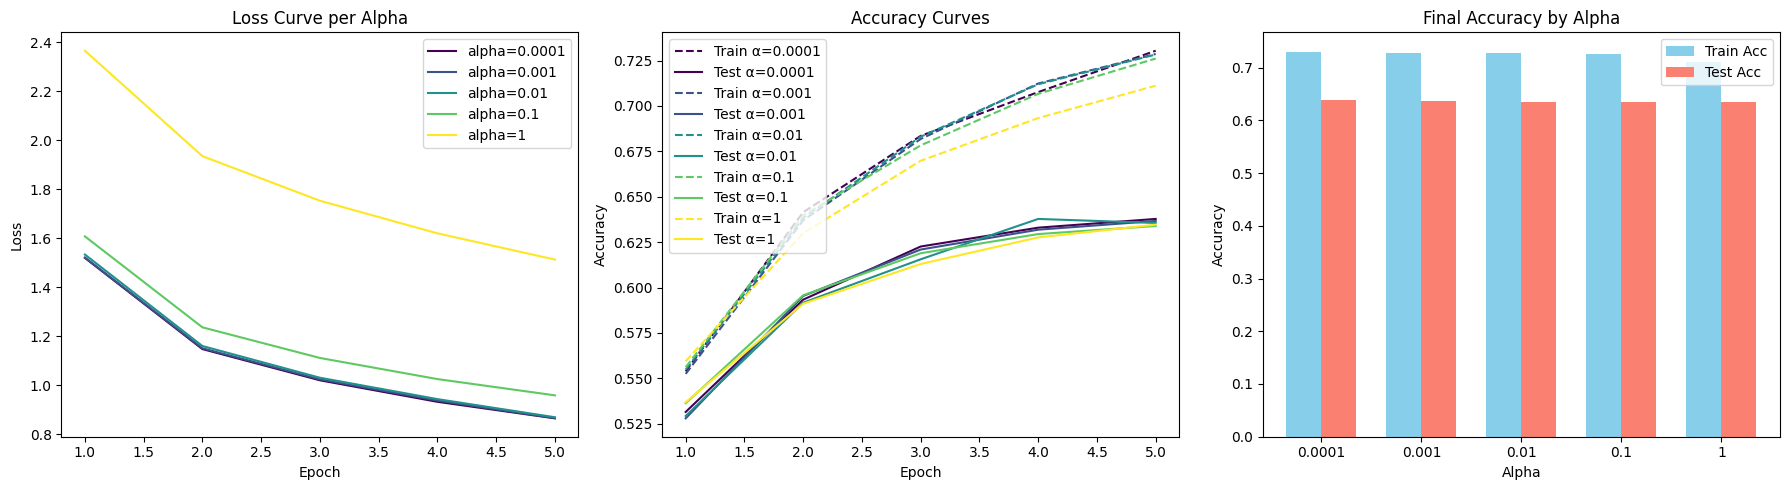

In [8]:
plot_alpha_impact(results)

---

## **Question 5: Comparing MLP Performance with Stratified vs. Unstratified Cross-Validation**

This function compares the performance of an **MLP classifier** using **5-fold cross-validation**, evaluating the effect of **stratification** on model accuracy. Key features include:

- Runing cross-validation **with and without stratification**
- Calculating the **mean accuracies** for both approaches
- Performing a **statistical t-test** to assess significance

The function returns:

- Both **accuracy scores** for both methods
- The **p-value** from the t-test
- A **conclusion** indicating whether the difference in performance is statistically significant

In [13]:
final_accuracy_no_strat, final_accuracy_strat, p_value, result_string = coc.q5()

print(f"Final Testing Accuracy without Stratification: {final_accuracy_no_strat}")
print(f"Final Testing Accuracy with Stratification: {final_accuracy_strat}")
print(f"P-value: {p_value}")
print(f"Conclusion: {result_string}")


def plot_test_results(accuracy_values, labels, delta):
    colors = ['skyblue', 'lightgreen']

    plt.figure(figsize=(9, 6))
    bars = plt.bar(labels, accuracy_values, color=colors)

    # Annotate bar heights
    for bar, acc in zip(bars, accuracy_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{acc:.3f}', ha='center', fontsize=11)

    # Δ Accuracy annotation
    plt.text(0.5, max(accuracy_values) + 0.025,
            f"Δ Accuracy: {delta:.4f}",
            ha='center', fontsize=12, fontweight='bold')

    # Significance line
    if p_value < 0.05:
        plt.axhline(y=max(accuracy_values), color='red', linestyle='--', linewidth=1)
        plt.text(0.5, max(accuracy_values) + 0.01, 'p < 0.05 → Significant',
                color='red', ha='center', fontsize=10)

    # Titles and labels
    plt.title("Impact of Stratified Splitting on MLP Accuracy (5-Fold CV)", fontsize=13)
    #plt.suptitle("Model: MLPClassifier | Hidden layers: (128, 64) | Learning rate: 0.005", fontsize=9, y=0.93)
    plt.ylabel('Mean Accuracy')
    plt.ylim(0, max(accuracy_values) + 0.07)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Conclusion
    textstr = f'P-value: {p_value:.4f}\nConclusion:\n{result_string}'
    plt.gcf().text(0.7, 0.5, textstr, fontsize=11,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.show()

C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores without Stratification: [0.11055556 0.11648148 0.10796296 0.10833333 0.09481481]


C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores with Stratification: [0.11111111 0.09259259 0.11111111 0.11111111 0.09222222]
Final Testing Accuracy without Stratification: 0.10762962962962963
Final Testing Accuracy with Stratification: 0.10362962962962963
P-value: 0.5107400819979973
Conclusion: Splitting method had no effect


C:\Users\Robert\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


---

### **Evaluating the Effect of Stratification in 5-Fold Cross-Validation**

The bar chart below compares the **mean test accuracy** of an **MLP classifier** under two different cross-validation strategies:

- 🔵 **Without Stratification**
- 🟢 **With Stratification**

---

#### **Bar Chart Insights**
- Each bar represents the **average testing accuracy** over 5 folds.
- A **Δ Accuracy** annotation quantifies the difference in performance between the two strategies.
- The red dashed line and annotation appear only if the **p-value < 0.05**, indicating a **statistically significant difference** in performance.

---

#### **Statistical Significance**
- A **t-test** is used to evaluate whether stratification has a meaningful effect on model performance.
- **P-value:**  
  - `p < 0.05` → The difference is **statistically significant**.  
  - `p ≥ 0.05` → The difference is **not statistically significant**.

---

**Conclusion:**  
The chart and p-value together help determine if **stratified sampling** leads to **more consistent and reliable accuracy**, particularly when working with **imbalanced datasets**.

---

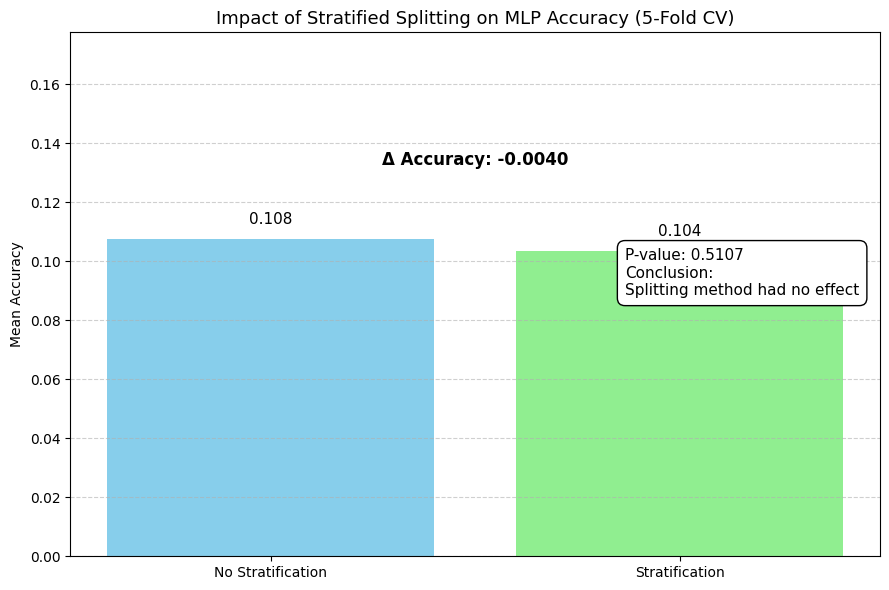

In [10]:
plot_test_results([final_accuracy_no_strat, final_accuracy_strat], ['No Stratification', 'Stratification'], final_accuracy_strat - final_accuracy_no_strat)

---

## **Question 6: Dimensionality Reduction with Locally Linear Embedding (LLE)**

This function applies **unsupervised dimensionality reduction** using **Locally Linear Embedding (LLE)** to transform the dataset into a **2-dimensional space**.

- Helps in **visualising high-dimensional data**
- Preserves local structure by leveraging **manifold learning**
- Projects the data into **2D** for downstream tasks like visualisation or clustering


In [5]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(coc.y)

transformed_data = coc.q6()

In [6]:
def plot_transform_results(transformed_data, encoder, y_encoded):
    neighbors_list = [10, 30, 50]
    
    # Create a figure to hold subplots for each n_neighbors value
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, n in enumerate(neighbors_list):
        ax = axes[i]
        # Get the data for the current n_neighbors
        data = transformed_data[n]

        # Plot the classwise points (without the legend)
        for class_index in range(len(encoder.classes_)):
            ax.scatter(
                data[y_encoded == class_index, 0],
                data[y_encoded == class_index, 1],
                s=10
            )
        
        ax.set_title(f'LLE - n_neighbors={n}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


---

## LLE - Classwise Colored Embedding

The plot below visualises the dataset after applying **Locally Linear Embedding (LLE)**, a nonlinear dimensionality reduction technique. LLE reduces the data from a high-dimensional space to a 2-dimensional space, with the aim of preserving local neighborhood relationships between points.

### What the Plots Show:
- Each **point** represents a data sample, now embedded in 2D space.
- Points are **colored by class**, using the original labels.
- The **distribution and separation** of points help us understand how the model perceives class differences after dimensionality reduction.

### Interpretation:
- **Tight clusters** of a single color suggest that samples of the same class have similar feature representations.
- **Overlap between clusters** may indicate that those classes are harder to separate using the current features.
- This visualization is helpful for evaluating how well LLE captures the structure of the data and can reveal whether the classes are inherently separable.

---

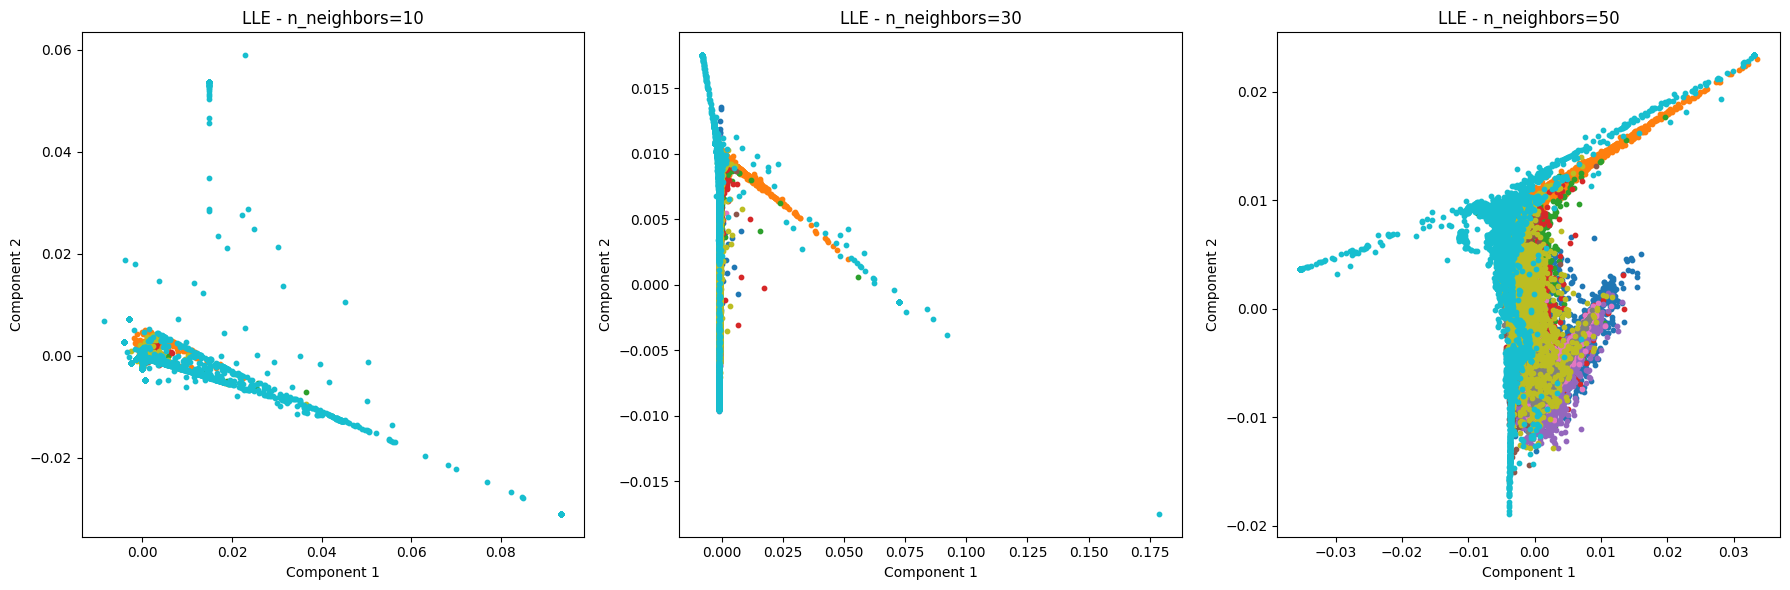

In [8]:
plot_transform_results(transformed_data, encoder, y_encoded)

---